In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# Get all CSV files in the current directory
csv_files = sorted(glob.glob('res-*.csv'))
print(f"Found {len(csv_files)} CSV files: {csv_files}")

Found 10 CSV files: ['res-0.csv', 'res-1.csv', 'res-2.csv', 'res-3.csv', 'res-4.csv', 'res-5.csv', 'res-6.csv', 'res-7.csv', 'res-8.csv', 'res-9.csv']


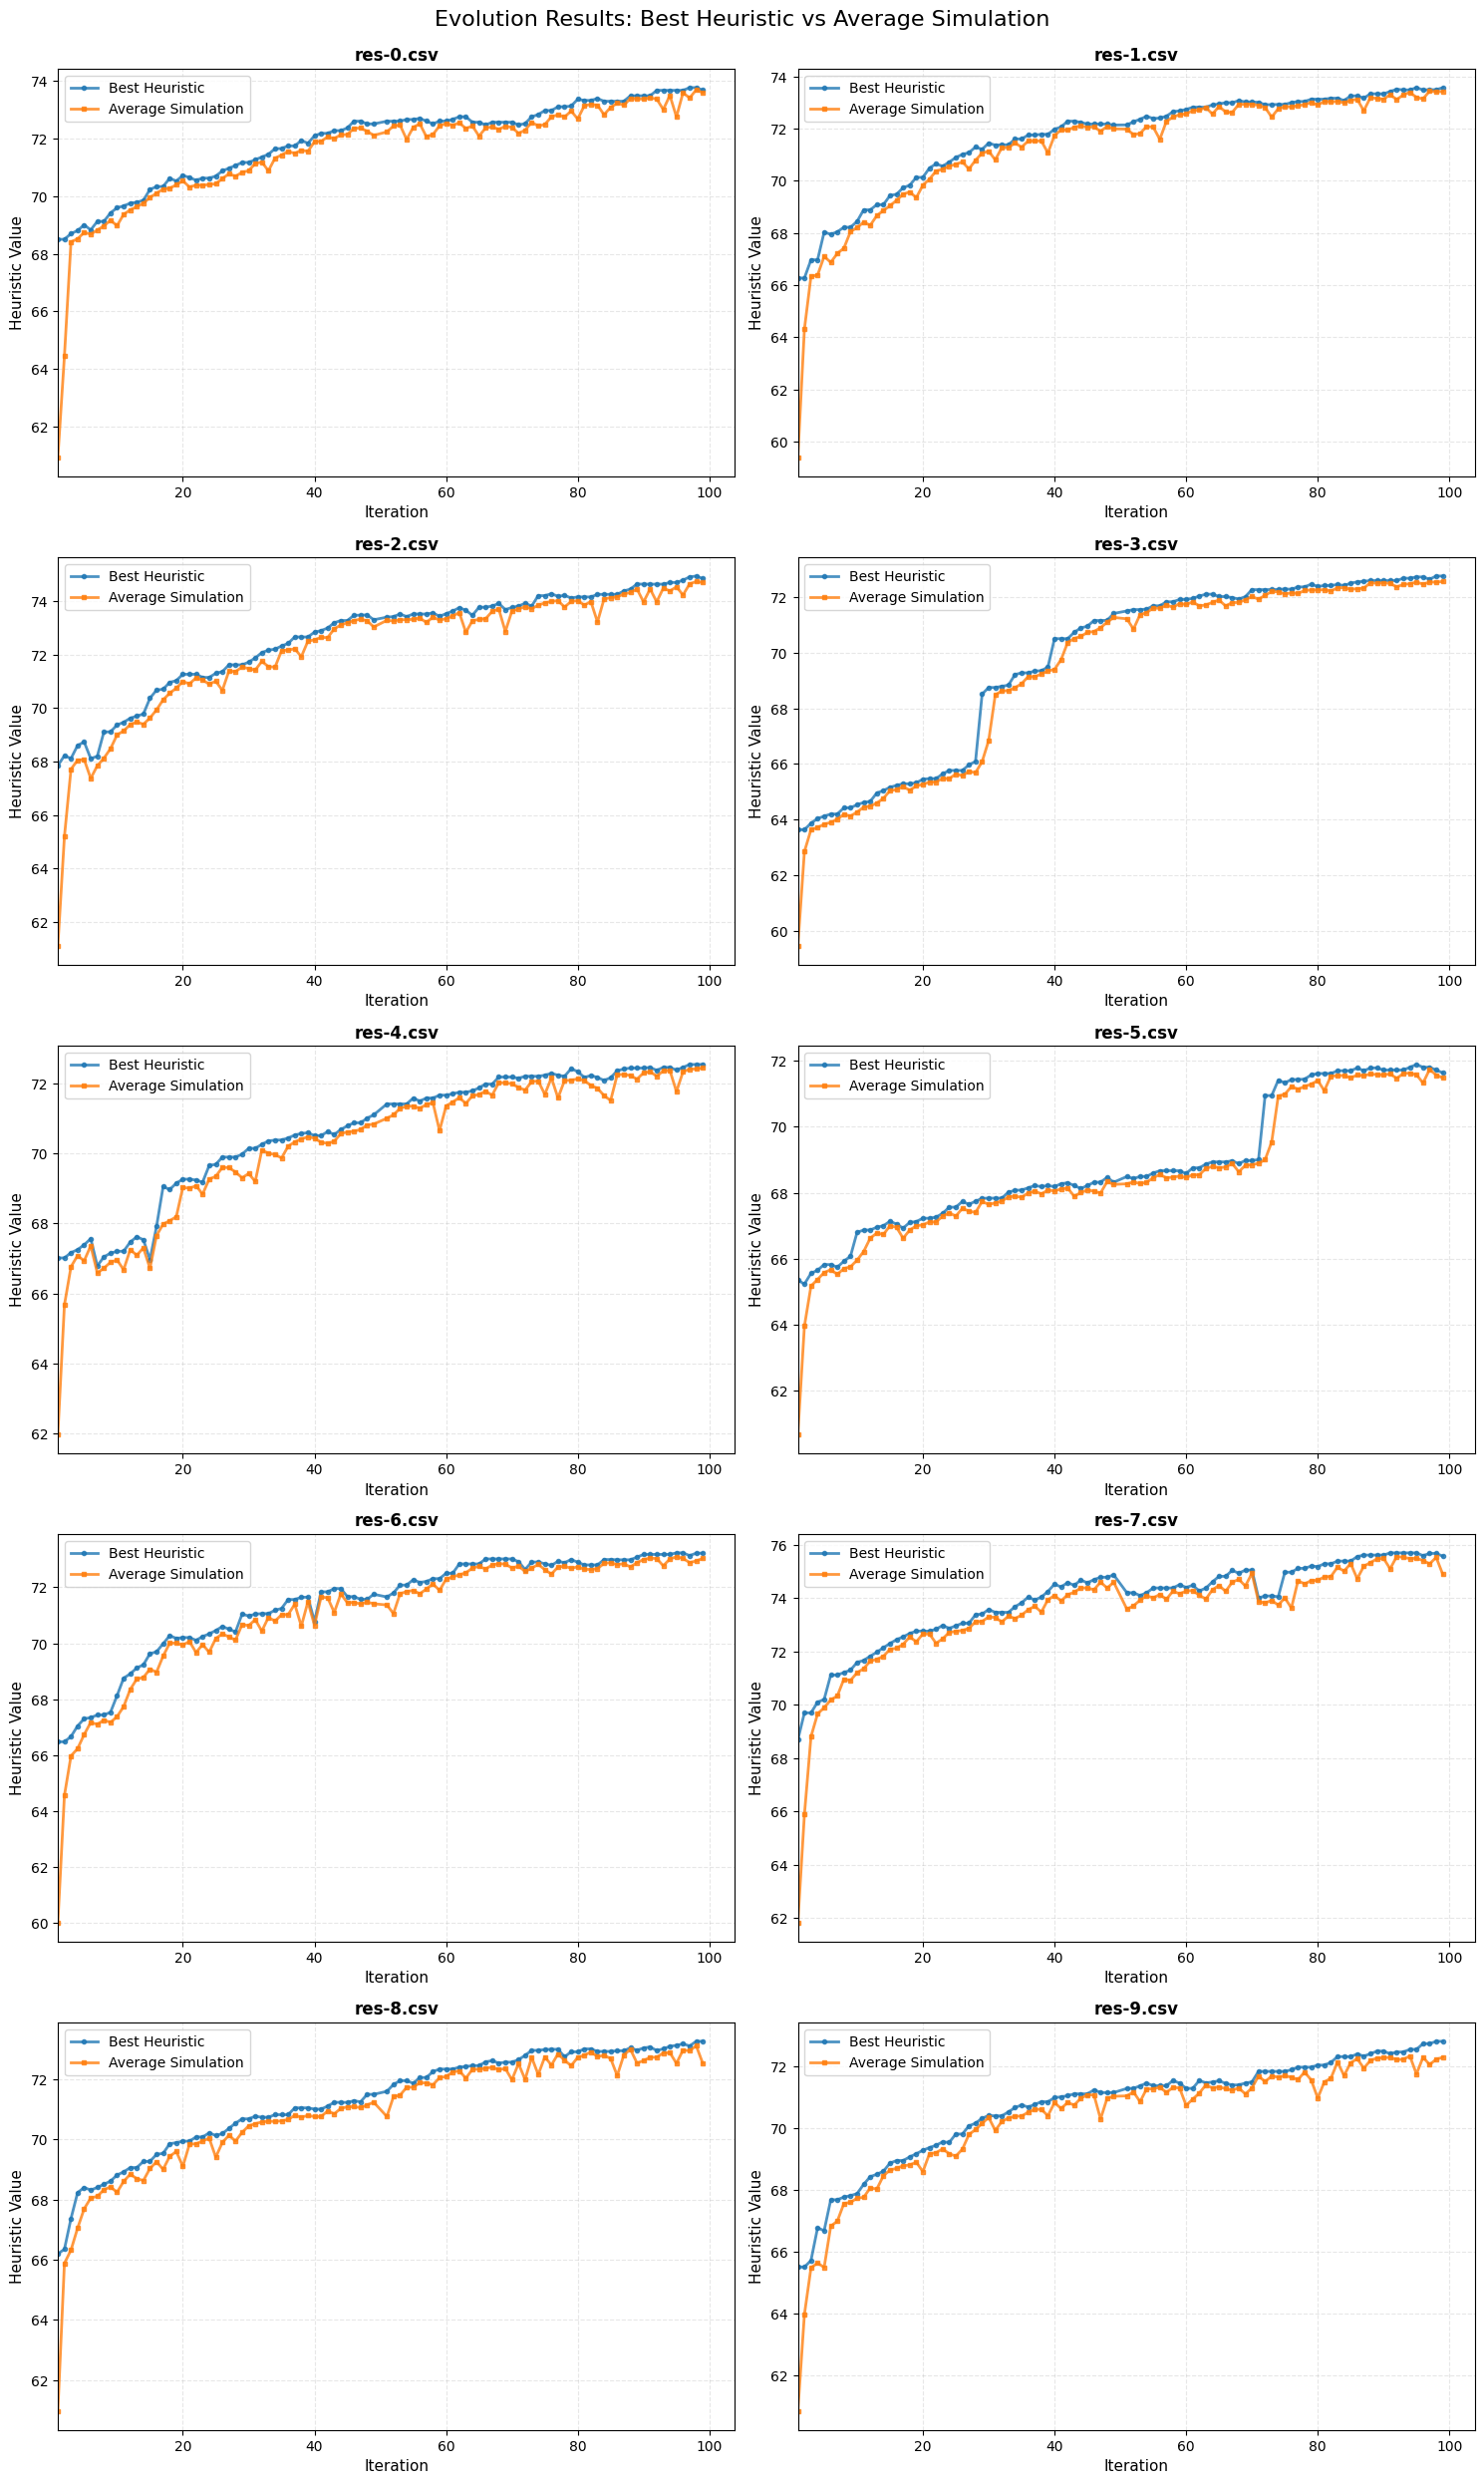

In [3]:
# Create subplots for all CSV files
n_files = len(csv_files)
n_cols = 2
n_rows = (n_files + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Evolution Results: Best Heuristic vs Average Simulation', fontsize=16, y=0.995)

# Flatten axes array for easier iteration
if n_files == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Plot each CSV file
for idx, csv_file in enumerate(csv_files):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Plot on the corresponding subplot
    ax = axes[idx]
    
    # Plot both lines
    ax.plot(df['iteration'], df['best_heuristic'], 
            label='Best Heuristic', linewidth=2, marker='o', markersize=3, alpha=0.8)
    ax.plot(df['iteration'], df['avg_simulation'], 
            label='Average Simulation', linewidth=2, marker='s', markersize=3, alpha=0.8)
    
    # Formatting
    ax.set_xlabel('Iteration', fontsize=11)
    ax.set_ylabel('Heuristic Value', fontsize=11)
    ax.set_title(f'{os.path.basename(csv_file)}', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_xlim(left=df['iteration'].min())

# Hide any unused subplots
for idx in range(n_files, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## Combined View - All Runs

This section shows all runs overlaid on a single plot for comparison.

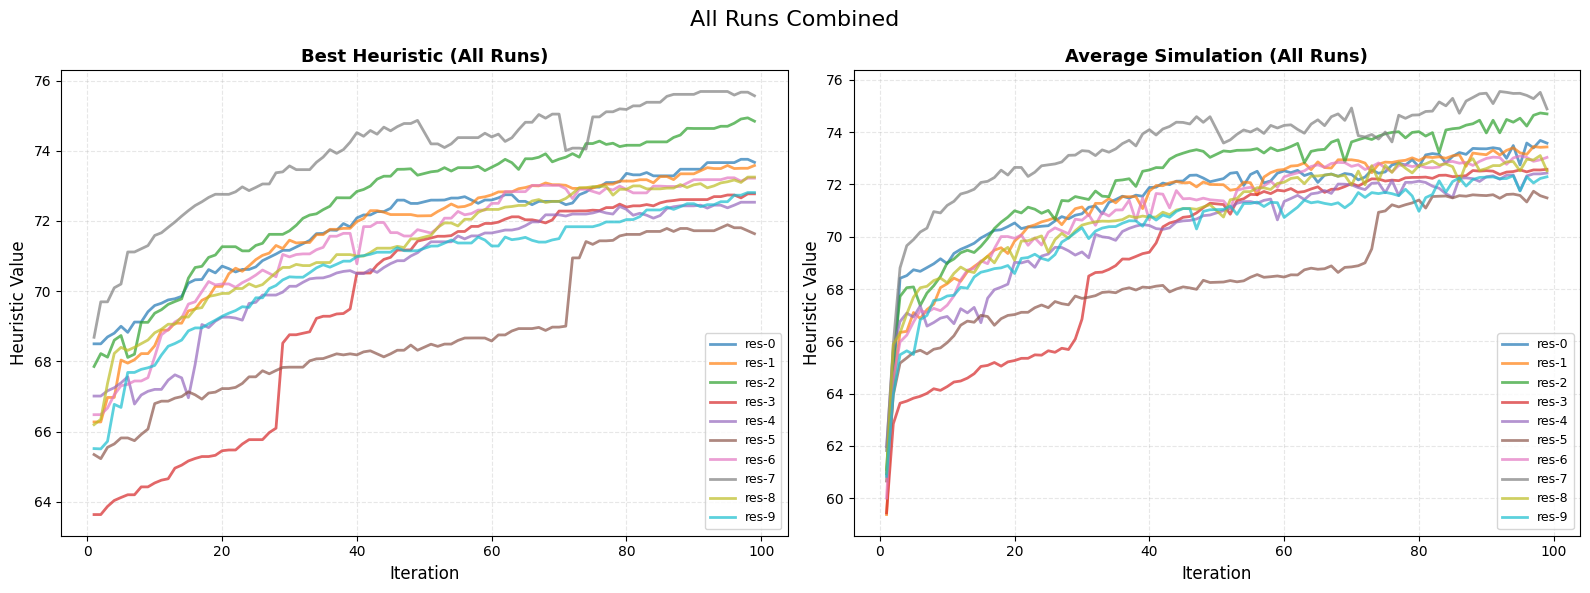

In [4]:
# Create a combined plot showing all runs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('All Runs Combined', fontsize=16)

# Color map for different runs
colors = plt.cm.tab10(range(len(csv_files)))

for idx, csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file)
    run_name = os.path.basename(csv_file).replace('.csv', '')
    
    # Plot best heuristic
    ax1.plot(df['iteration'], df['best_heuristic'], 
             label=run_name, linewidth=2, alpha=0.7, color=colors[idx])
    
    # Plot average simulation
    ax2.plot(df['iteration'], df['avg_simulation'], 
             label=run_name, linewidth=2, alpha=0.7, color=colors[idx])

# Formatting for best heuristic plot
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Heuristic Value', fontsize=12)
ax1.set_title('Best Heuristic (All Runs)', fontsize=13, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3, linestyle='--')

# Formatting for average simulation plot
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Heuristic Value', fontsize=12)
ax2.set_title('Average Simulation (All Runs)', fontsize=13, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## Statistical Summary

Summary statistics across all runs.

In [5]:
# Calculate statistics across all runs
all_data = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    run_name = os.path.basename(csv_file).replace('.csv', '')
    
    stats = {
        'Run': run_name,
        'Final Best': df['best_heuristic'].iloc[-1],
        'Final Avg': df['avg_simulation'].iloc[-1],
        'Max Best': df['best_heuristic'].max(),
        'Max Avg': df['avg_simulation'].max(),
        'Iterations': len(df)
    }
    all_data.append(stats)

summary_df = pd.DataFrame(all_data)
print("\nSummary Statistics:")
print(summary_df.to_string(index=False))
print("\nOverall Statistics:")
print(f"Best Final Value: {summary_df['Final Best'].max():.2f}")
print(f"Average Final Value: {summary_df['Final Avg'].mean():.2f}")
print(f"Std Dev (Final Best): {summary_df['Final Best'].std():.2f}")


Summary Statistics:
  Run  Final Best  Final Avg  Max Best   Max Avg  Iterations
res-0   73.670815  73.579200  73.75689 73.682370          98
res-1   73.580246  73.433840  73.58092 73.447495          98
res-2   74.841896  74.696690  74.93805 74.731700          98
res-3   72.772730  72.577290  72.77273 72.577290          98
res-4   72.533140  72.436070  72.53314 72.436070          98
res-5   71.636880  71.485374  71.89111 71.740204          98
res-6   73.219120  73.032906  73.22994 73.089170          98
res-7   75.566710  74.887344  75.68883 75.553696          98
res-8   73.250250  72.519090  73.25025 73.103010          98
res-9   72.809170  72.291534  72.80917 72.333496          98

Overall Statistics:
Best Final Value: 75.57
Average Final Value: 73.09
Std Dev (Final Best): 1.13


### --------------killer----------------
- Passed %:     90.0
- Avg. coins:   30.8
- Avg. enemies: 18.4